<a href="https://colab.research.google.com/github/shyamsundar-v/Book-Recommendation-System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

Dataset Overview

The Book-Crossing dataset comprises 3 files -

● Users : Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

● Books : Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

● Ratings : Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

Load The Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
users_df = pd.read_csv('/content/drive/MyDrive/ML_Book_Recommendation/Data/Users.csv')
books_df = pd.read_csv('/content/drive/MyDrive/ML_Book_Recommendation/Data/Books.csv')
ratings_df = pd.read_csv('/content/drive/MyDrive/ML_Book_Recommendation/Data/Ratings.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
print(users_df.shape)
users_df.head()

(278858, 3)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
print(books_df.shape)
books_df.head()

(271360, 8)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
print(ratings_df.shape)
ratings_df.head()

(1149780, 3)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


# Exploratory Data Analysis

# 1. Users DataFrame

In [7]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [8]:
users_df.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [9]:
users_df.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

From the above we can see that there are more than 11k null values in the Age column. So let us explore more on this column.

In [10]:

users_df['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


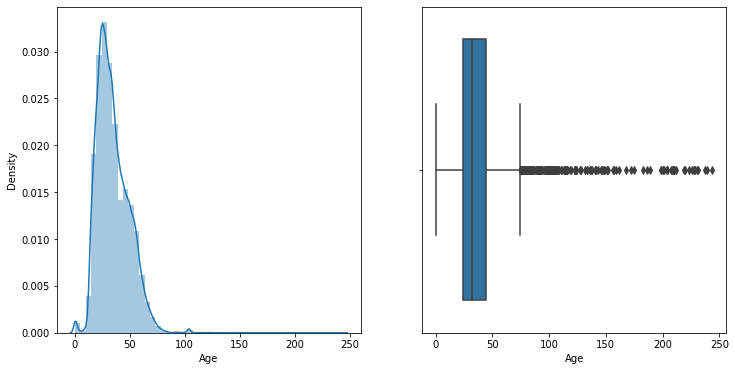

In [11]:
# fig,axis = plt.subplots(1,2)
# sns.distplot(users_df['Age'],kde=True,ax=axis[0,1])
# sns.boxplot(users_df['Age'],kde=True,ax=axis[0,2])
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(users_df['Age'],kde=True)

plt.subplot(1,2,2)
sns.boxplot(users_df['Age'])


From the above we can see that there are many outliers in the Age feature. There are many values which are beyong the age 100 which is nit possible. So have to take care of this further.

In [12]:
users_df['Location'].value_counts()

london, england, united kingdom                  2506
toronto, ontario, canada                         2250
sydney, new south wales, australia               1744
melbourne, victoria, australia                   1708
portland, oregon, usa                            1629
                                                 ... 
gneisenaustr. 3, nordrhein-westfalen, germany       1
-, bayern, germany                                  1
bouchegouf, guelma, algeria                         1
indiana and philadelphia, pennsylvania, usa         1
tacoma, washington, united kingdom                  1
Name: Location, Length: 57339, dtype: int64

In [13]:
users_df['Age'].fillna(round(users_df['Age'].mean()),inplace=True)

In [14]:
users_df['Age'].nunique()

165

In [15]:
users_df[(users_df['Age']<7)  | (users_df['Age']>70)] = 35

In [16]:
users_df['Age'].nunique()

64

In [17]:
users_df['Age'].unique()

array([35., 18., 17., 61., 26., 14., 25., 19., 46., 55., 32., 24., 20.,
       34., 23., 51., 31., 21., 44., 30., 57., 43., 37., 41., 54., 42.,
       50., 39., 53., 47., 36., 28., 13., 58., 49., 38., 45., 62., 63.,
       27., 33., 29., 66., 40., 15., 60., 22., 16., 65., 59., 48., 56.,
       67., 52., 69.,  9., 64., 12., 68., 11., 70.,  8.,  7., 10.])

In [18]:
users_df.isna().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [99]:
df = users_df['Age'].value_counts().sort_values(ascending=False)
df

35.0    117845
24.0      5687
25.0      5618
26.0      5547
23.0      5456
         ...  
11.0       121
10.0        84
9.0         62
8.0         54
7.0         27
Name: Age, Length: 64, dtype: int64

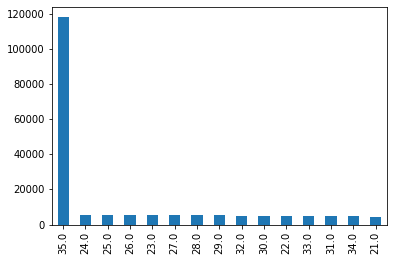

In [103]:
users_df['Age'].value_counts().sort_values(ascending=False).head(15).plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


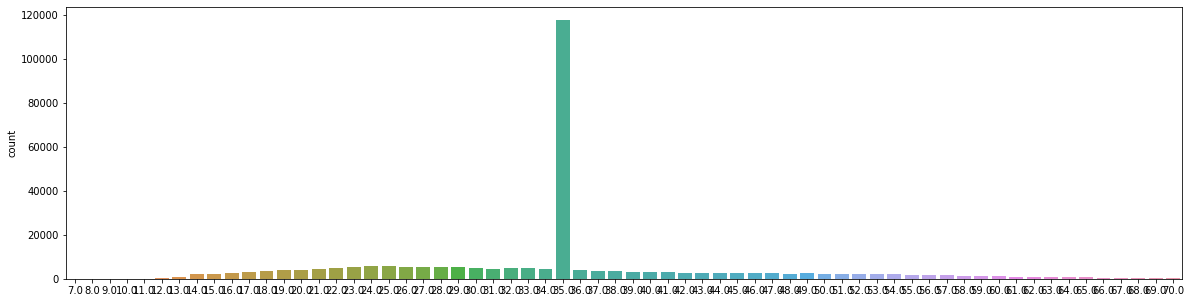

In [97]:
plt.figure(figsize=(20,5))
sns.countplot(users_df['Age'].values.round())

# 2. Books DataFrame

In [19]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [20]:
books_df.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [21]:
print(books_df['Year-Of-Publication'].unique())

[2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917 1901
 2010 1908 1906 1935 1806 2021 '2000' '1995' '1999' '2004' '2003' '1990'
 '1994' '1986' '1989' '2002' '1981' '1993' '1983' '1982' '1976' '1991'
 '1977' '1998' '1992' '1996' '0' '1997' '2001' '1974' '1968' '1987' '1984'
 '1988' '1963' '1956' '1970' '1985' '1978' '1973' '1980' '1979' '1975'
 '1969' '1961' '1965' '1939' '1958' '1950' '1953' '1966' '1971' '1959'
 '1972' '1955' '1957' '1945' '1960' '1967' '1932' '1924' '1964' '2012'
 '1911' '1927' '1948' '1962' '2006' '1952' '1940' '1951' '1931' '1954

In [22]:
books_df[(books_df['Year-Of-Publication']=='DK Publishing Inc') | (books_df['Year-Of-Publication']=='Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [23]:
books_df[(books_df['Book-Author']==2000) | (books_df['Book-Author']==2003)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [24]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [25]:
books_df.loc[(books_df['Year-Of-Publication']=='DK Publishing Inc'),'Year-Of-Publication']=2000
books_df.loc[(books_df['Year-Of-Publication']=='Gallimard'),'Year-Of-Publication']=2003


In [26]:
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype(int)

In [27]:
books_df['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037])

Here there are some value which are flaws i.e misleading. past data cannot have the year which is greater than present year and also cannot have 0 as a year.

In [28]:
books_df[(books_df['Year-Of-Publication']==0) | (books_df['Year-Of-Publication']>2022)].nunique()

ISBN                   4631
Book-Title             4485
Book-Author            3314
Year-Of-Publication       7
Publisher              1002
Image-URL-S            4624
Image-URL-M            4624
Image-URL-L            4624
dtype: int64

In [29]:
books_df['Year-Of-Publication'].value_counts()

2002    17627
1999    17431
2001    17359
2000    17234
1998    15766
        ...  
1910        1
1934        1
1914        1
1904        1
2037        1
Name: Year-Of-Publication, Length: 116, dtype: int64

In [30]:
books_df.loc[(books_df['Year-Of-Publication'] == 0) | (books_df['Year-Of-Publication'] > 2022), 'Year-Of-Publication'] = np.nan

In [31]:
books_df['Year-Of-Publication'].fillna(2002,inplace=True)

In [32]:
books_df[(books_df['Year-Of-Publication']==0) | (books_df['Year-Of-Publication']>2022)].nunique()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

As we can see after impoting the misleading values to the mode then we can see there is no values that has a publication year as 0 or beyond 2022

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


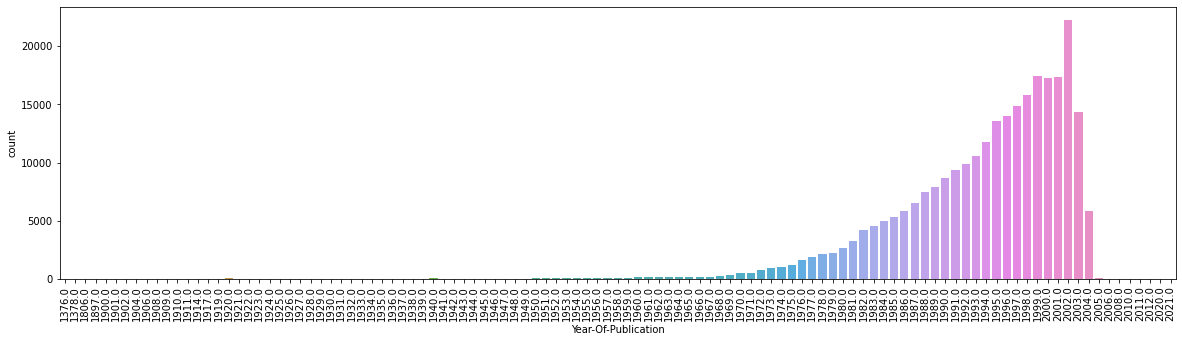

In [33]:
plt.figure(figsize=(20,5))
sns.countplot(books_df['Year-Of-Publication'])
plt.xticks(Rotation=90)
plt.show();

From the above we can see that most of the books published between 1999 -2002 wit more that 17k books and 2002 is the year with most of the books published which is 17627.

In [34]:
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [35]:
books_df.drop(columns = ['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis = 1, inplace  = True)

In [36]:

print(books_df.duplicated().any())
print(books_df.shape)

False
(271360, 5)


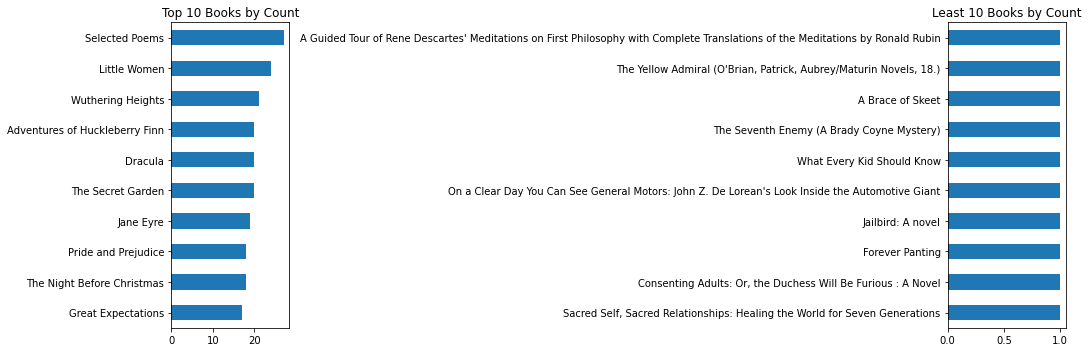

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
books_df['Book-Title'].value_counts().head(10).sort_values().plot(kind='barh', title='Top 10 Books by Count')
plt.subplot(1,2,2)
books_df['Book-Title'].value_counts().tail(10).sort_values().plot(kind='barh', title='Least 10 Books by Count')
plt.tight_layout()
plt.show();

From the above plot we can say that out of the top 10 books selected poems is the one which got published are sold most number of times.

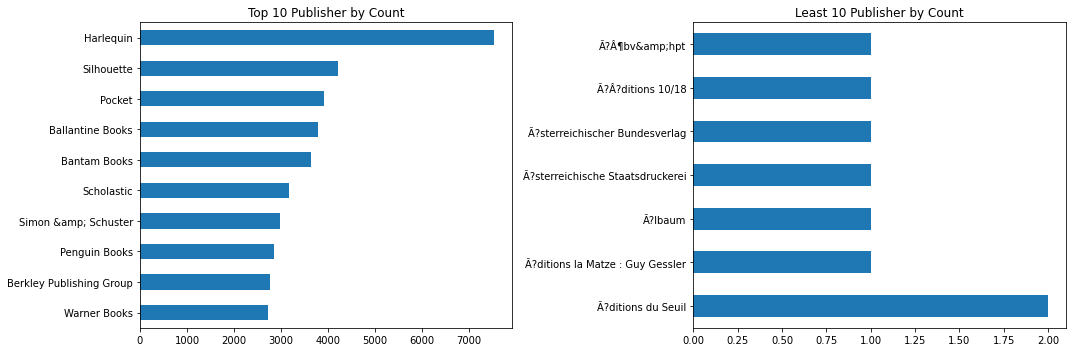

In [38]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
books_df['Publisher'].value_counts().head(10).sort_values().plot(kind='barh', title='Top 10 Publisher by Count')
plt.subplot(1,2,2)
books_df['Publisher'].sort_values().tail(10).value_counts().plot(kind='barh', title='Least 10 Publisher by Count')

plt.tight_layout()

From the above plots we can see that the publishers with both number of books published and the publishers with the least number of books published so from the above I can say that Harlequin is the publisher who published the most number of books

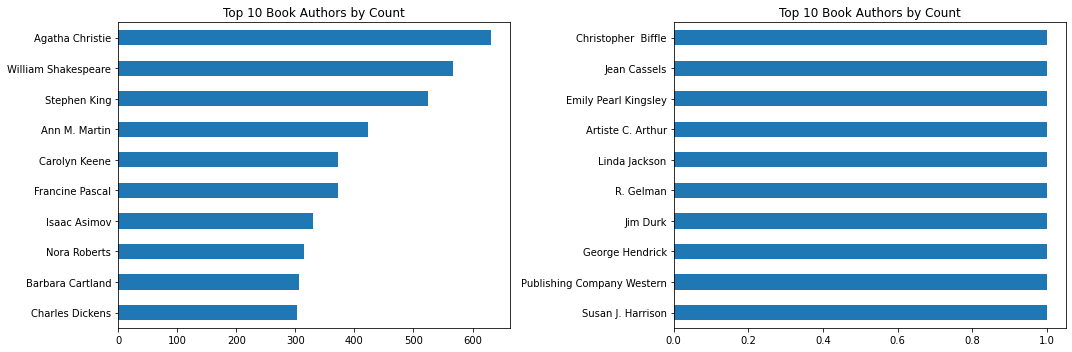

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
books_df['Book-Author'].value_counts().head(10).sort_values().plot(kind='barh', title='Top 10 Book Authors by Count')
plt.subplot(1,2,2)
books_df['Book-Author'].value_counts().tail(10).sort_values().plot(kind='barh', title='Top 10 Book Authors by Count')

plt.tight_layout()

From the baove plot says that Agatha Christie is the author with the highest number of books published and the author Christopher baffle is the one who published the lower number of books

# 3.Ratings DataFrame


In [40]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [41]:
ratings_df.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [42]:
ratings_df['Book-Rating'].value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

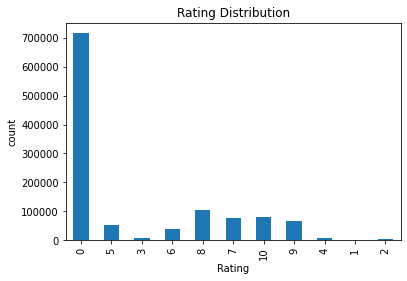

In [43]:
ratings_df['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('count')
plt.show();

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64


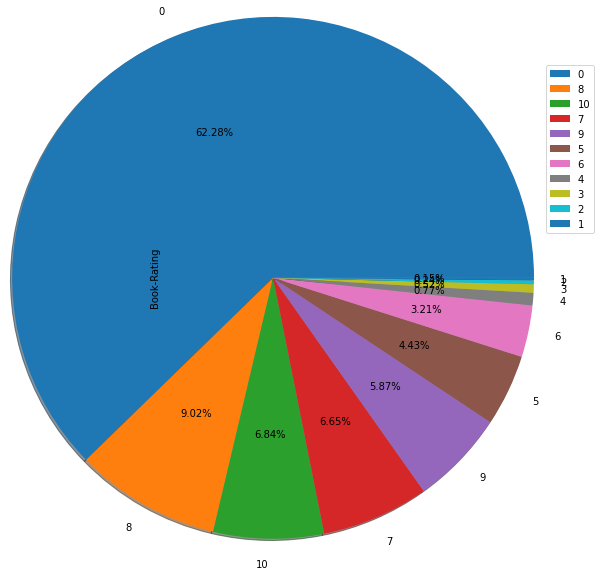

In [44]:
print(ratings_df['Book-Rating'].value_counts())
ratings_df['Book-Rating'].value_counts().plot(kind='pie', autopct='%1.2f%%',shadow=True,radius=3)
plt.legend(loc='upper right', bbox_to_anchor=(2,1.5))
plt.show();

From the above plot we can see that more than 62% of the ratings work zero at the least rating was given as 1 we can say that 10 is the highest rated book and zero is the lowest rated and we got only around 7% off the books were rated as 10.

In [45]:
ratings_df.duplicated().any()

False

# Collaborative Filtering Using K-Nearest Neighbours

In [46]:
ratings_df

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


To ensure statistical significance users with less than 200 ratings and books with last time 100 ratings are excluded.

In [47]:
ratings_df['Book-Rating'].value_counts().describe()

count        11.000000
mean     104525.454545
std      205928.793699
min        1770.000000
25%        7450.000000
50%       50974.000000
75%       77533.500000
max      716109.000000
Name: Book-Rating, dtype: float64

In [48]:
counts1 =ratings_df['User-ID'].value_counts()
counts1

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: User-ID, Length: 105283, dtype: int64

In [49]:
ratings = ratings_df.copy()

In [50]:
counts1 =ratings['User-ID'].value_counts()
ratings = ratings[ratings['User-ID'].isin(counts1[counts1>=200].index)]
counts = ratings['Book-Rating'].value_counts()
ratings = ratings[ratings_df['Book-Rating'].isin(counts[counts>=100].index)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [51]:
ratings

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0
...,...,...,...
1147612,275970,3829021860,0
1147613,275970,4770019572,0
1147614,275970,896086097,0
1147615,275970,9626340762,8


In [52]:
combine_book_rating= pd.merge(ratings,books_df, on = 'ISBN')
combine_book_rating.drop(['Year-Of-Publication','Publisher','Book-Author'],axis=1,inplace=True)
combine_book_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


In [53]:
combine_book_rating.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
Book-Title     0
dtype: int64

In [54]:
book_rating_count_df = combine_book_rating.groupby('Book-Title')[['Book-Rating']].count().reset_index().rename(columns={'Book-Rating':'Total Rating Count'})[['Book-Title',
                                                                                                                                                             'Total Rating Count']]
book_rating_count_df.head()                                                                                                                                                     

,Book-Title,Total Rating Count
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [55]:
bookRating_with_totalRatingCount_df =  combine_book_rating.merge(book_rating_count_df, on='Book-Title', how='left')
print(bookRating_with_totalRatingCount_df.shape)
bookRating_with_totalRatingCount_df.head()


(488742, 5)


,User-ID,ISBN,Book-Rating,Book-Title,Total Rating Count
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [56]:
bookRating_with_totalRatingCount_df.describe()

,User-ID,Book-Rating,Total Rating Count
count,488742.000000,488742.000000,488742.000000
mean,142092.189286,1.950086,21.173474
std,80655.317340,3.501856,37.189202
min,254.000000,0.000000,1.000000
25%,73394.000000,0.000000,2.000000
50%,144531.000000,0.000000,6.000000
75%,212898.000000,0.000000,22.000000
max,278418.000000,10.000000,365.000000


From the above table we can see that there are many books with the total ratings are quite less so we will keep a threshold value to get those books having rating above the threshold value.

In [57]:

popularity_threshold = 50
highly_rated_books_df = bookRating_with_totalRatingCount_df[bookRating_with_totalRatingCount_df['Total Rating Count'] > popularity_threshold]
print(highly_rated_books_df.shape)
highly_rated_books_df.describe()

(60149, 5)


,User-ID,Book-Rating,Total Rating Count
count,60149.000000,60149.000000,60149.000000
mean,140661.252972,2.016808,102.618182
std,80780.813350,3.572658,52.122966
min,254.000000,0.000000,51.000000
25%,70052.000000,0.000000,65.000000
50%,140036.000000,0.000000,84.000000
75%,212923.000000,3.000000,123.000000
max,278418.000000,10.000000,365.000000


kNN is slow when you have a lot of observations, since it does not generalize over data in advance, it scans historical database each time a prediction is needed. With kNN you need to think carefully about the distance measure.

So for the sake of simplicity no now we will develop a model which will recommend the books to the users only in the location of USA and Canada.

In [58]:
combined_df = highly_rated_books_df.merge(users_df, on='User-ID', how='left')
combined_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Total Rating Count,Location,Age
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"gilbert, arizona, usa",48.0
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"knoxville, tennessee, usa",29.0
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82,"n/a, n/a, n/a",35.0
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"byron, minnesota, usa",18.0
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"cordova, tennessee, usa",32.0


In [59]:
usa_canada_users_df = combined_df[combined_df['Location'].str.contains("usa|canada",na=False)]
print(usa_canada_users_df.shape)
usa_canada_users_df.head()

(54296, 7)


,User-ID,ISBN,Book-Rating,Book-Title,Total Rating Count,Location,Age
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"gilbert, arizona, usa",48.0
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"knoxville, tennessee, usa",29.0
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"byron, minnesota, usa",18.0
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"cordova, tennessee, usa",32.0
5,16795,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"mechanicsville, maryland, usa",47.0


In [60]:
usa_canada_users_df.isna().sum()

User-ID               0
ISBN                  0
Book-Rating           0
Book-Title            0
Total Rating Count    0
Location              0
Age                   0
dtype: int64

**Cosine Similarity**

We will use cosine similarity with respect to kNN. kNN helps us to compute the distance between two points (consider books as a point here). So, we can use cosine to find the angle of line between two distance. Cosine similarity gives us the similarity score between two points(books in this case).


In [61]:
from scipy.sparse import csr_matrix

usa_canada_users_df = usa_canada_users_df.drop_duplicates(['User-ID', 'Book-Title'])
usa_canada_users_pivot = usa_canada_users_df.pivot(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating').fillna(0)
 
usa_canada_users_pivot

User-ID,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,271448,271705,273979,274061,274308,274808,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,7.0,0.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
usa_canada_users_matrix = csr_matrix(usa_canada_users_pivot.values)
usa_canada_users_matrix

<706x731 sparse matrix of type '<class 'numpy.float64'>'
	with 12566 stored elements in Compressed Sparse Row format>

In [63]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(usa_canada_users_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [64]:
query_index = np.random.choice(usa_canada_users_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(usa_canada_users_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 5)

465


In [65]:
usa_canada_users_pivot.index[query_index]

'Tears of the Giraffe (No.1 Ladies Detective Agency)'

In [66]:
distances.flatten()

array([0.        , 0.5088984 , 0.52063678, 0.73115679, 0.73523867])

In [67]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f"Recommendation for {usa_canada_users_pivot.index[query_index]}\n")
    else:
        print(f"{i}) {usa_canada_users_pivot.index[indices.flatten()[i]]} , with similarity of {round((1 - distances.flatten()[i]) * 100, 2)} %" )

Recommendation for Tears of the Giraffe (No.1 Ladies Detective Agency)

1) Morality for Beautiful Girls (No.1 Ladies Detective Agency) , with similarity of 49.11 %
2) The No. 1 Ladies' Detective Agency (Today Show Book Club #8) , with similarity of 47.94 %
3) The Kitchen God's Wife , with similarity of 26.88 %
4) Balzac and the Little Chinese Seamstress : A Novel , with similarity of 26.48 %


In [68]:
# Keeping records where ratings are not 0.
usa_canada_users_df= usa_canada_users_df[usa_canada_users_df['Book-Rating'] != 0]

**Model Building & Training**

Recommender systems have a problem known as user cold-start, in which it is hard to provide personalized recommendations for users with none or a very few number of consumed items, due to the lack of information to model their preferences.

For this reason, we are keeping in the dataset only users with at least 10 interactions.

In [69]:
user_interactions_count_df = usa_canada_users_df.groupby([ 'User-ID','ISBN']).size().groupby('User-ID').size()
print('Number of users: %d' % len(user_interactions_count_df))

users_with_enough_interactions_df = user_interactions_count_df[user_interactions_count_df >= 10].reset_index()[['User-ID']]
print('Number of users with at least 10 interactions: %d' % len(users_with_enough_interactions_df))

Number of users: 702
Number of users with at least 10 interactions: 440


In [70]:
print('Number of interactions: %d' % len(usa_canada_users_df))
interactions_from_selected_users_df = usa_canada_users_df.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('Number of interactions from users with at least 10 interactions: %d' % len(interactions_from_selected_users_df))

Number of interactions: 12566
Number of interactions from users with at least 10 interactions: 11212


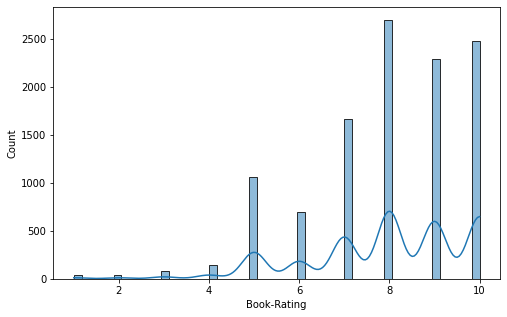

In [71]:
# Before log transformation
plt.figure(figsize=(8, 5))
sns.histplot(interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum(), kde=True)
plt.show()

Thus, to model the user interest on a given article, we aggregate all the interactions the user has performed in an item by a weighted sum of interaction type strength and apply a log transformation to smooth the distribution.

In [72]:
import math
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('Number of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

Number of unique user/item interactions: 11212


,ISBN,User-ID,Book-Rating
0,002542730X,12538,3.459432
1,002542730X,41084,3.000000
2,002542730X,52584,3.459432
3,002542730X,110934,2.807355
4,002542730X,113270,2.584963


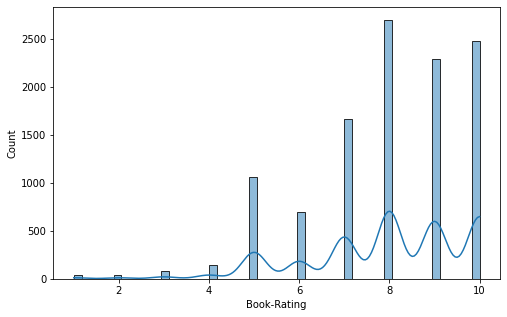

In [73]:
## Plot after log transformation
plt.figure(figsize=(8, 5))
sns.histplot(interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum(), kde=True)
plt.show()

Splitting dataset into train-test split.

In [74]:
from sklearn.model_selection import train_test_split


train_df, test_df = train_test_split(interactions_full_df,
                                     stratify = interactions_full_df['User-ID'],
                                     test_size = 0.20,
                                     random_state = 0
                                     )

print('Number of Train set: %d' % len(train_df))
print('Number of Test set: %d' % len(test_df))

Number of Train set: 8969
Number of Test set: 2243


In [75]:
user_items_pivot = train_df.pivot(index ='User-ID',
                              columns='ISBN',
                              values='Book-Rating').fillna(0)
user_items_pivot.head()                           

ISBN,002542730X,0060008032,006001203X,0060086246,0060096195,0060129565,0060158638,0060168013,006016848X,0060175400,...,1586210661,1586212230,1586212869,1586214055,1587882337,1590862910,185326041X,1878448900,1931056323,B0000T6KHI
User-ID,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
user_items_matrix = user_items_pivot.values

In [77]:
user_ids = list(user_items_pivot.index)
user_ids[:10]

[254, 2276, 2766, 4017, 6242, 6251, 6323, 6543, 6563, 6575]

**SVD - Latent Factor Model Collaborative Filtering**

SVD of Singular Value Decomposition a method from linear algebra that has been generally used as a dimensionality reduction technique in machine learning. SVD is a matrix factorisation technique, which reduces the number of features of a dataset by reducing the space dimension from N-dimension to K-dimension (where K < N). In the context of the recommender system, the SVD is used as a collaborative filtering technique. It uses a matrix structure where each row represents a user(User-ID in this case), and each column represents an item(Book ISBN in this case). The elements of this matrix are the ratings that are given to items by users(Book rating given by user). It provides another way to factorize a matrix, into singular vectors and singular values.

In [78]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [79]:
## Number of factors tp factor the the user-item matrix
NUMBER_OF_FACTORS = 25

## Performing matrix factorization of user_items_matrix
U, sigma, Vt = svds(user_items_matrix, k = NUMBER_OF_FACTORS)

In [80]:
## Checking the shape of user_items_matrix and U

print(user_items_matrix.shape)
print(U.shape)

(440, 1368)
(440, 25)


In [81]:
sigma = np.diag(sigma)
sigma.shape

(25, 25)

In [82]:
Vt.shape

(25, 1368)

Reconstructing the original matrix by multiplying with its factors. The resulting matrix will no be sparse matrix. It is predicted values for the items user haven't yet interacted with.

In [83]:
predicted_user_ratings = np.dot(np.dot(U, sigma), Vt)
predicted_user_ratings

array([[ 0.02331653, -0.00477672,  0.03946087, ...,  0.0237473 ,
         0.01020334, -0.04522779],
       [ 0.01771031,  0.06683345, -0.01792886, ..., -0.02214277,
        -0.00558284,  0.00945768],
       [ 0.11116677, -0.08725064, -0.07726693, ..., -0.00440623,
         0.03084771,  0.09150349],
       ...,
       [-0.00654772,  0.07414445, -0.00753871, ..., -0.00433491,
         0.00291103, -0.09580962],
       [ 0.01957174,  0.03769397, -0.00141207, ..., -0.01546894,
         0.00209726, -0.05791241],
       [ 0.033563  ,  0.05684178, -0.0272093 , ..., -0.04543361,
         0.00783708, -0.07642772]])

Creating a dataframe from predicted ratings for each user.

In [84]:
## Converting predicted ratings matrix into dataframe

pred_df = pd.DataFrame(predicted_user_ratings, columns = user_items_pivot.columns, index = user_ids).transpose()
pred_df.head()

,254,2276,2766,4017,6242,6251,6323,6543,6563,6575,...,270713,270820,271195,271448,271705,273979,274061,274308,275970,277427
ISBN,,,,,,,,,,,,,,,,,,,,,
002542730X,0.023317,0.017710,0.111167,0.267665,0.197612,0.094080,0.016516,0.169529,0.084470,0.511099,...,-0.001889,-0.048614,-0.000323,0.276946,-0.060039,0.051615,0.036014,-0.006548,0.019572,0.033563
0060008032,-0.004777,0.066833,-0.087251,-0.253518,0.059393,0.119440,0.013003,-0.019878,0.059503,0.539756,...,0.145843,0.122186,0.019800,0.115348,0.188034,-0.062977,0.016586,0.074144,0.037694,0.056842
006001203X,0.039461,-0.017929,-0.077267,0.044857,-0.080568,0.126179,0.029300,0.027687,-0.049546,0.040466,...,0.028809,-0.007892,0.086657,-0.289982,-0.028741,0.105495,0.029131,-0.007539,-0.001412,-0.027209
0060086246,0.001752,0.020425,-0.029392,-0.085316,-0.043535,-0.034023,0.006893,0.007710,-0.029878,0.123296,...,0.039515,0.010914,-0.005019,-0.004517,0.033502,0.029530,-0.039208,0.043662,0.026568,0.032900
0060096195,0.028016,0.022378,-0.005133,-0.143797,-0.001201,-0.003111,-0.001637,-0.035143,0.384911,-0.230872,...,-0.097135,0.092037,0.088730,-0.122530,0.172245,0.101675,-0.137634,0.047258,-0.021715,0.074478


Creating a Recommender Class for Collaborative Filtering

In [85]:
import random

In [86]:
class Recommender:

    MODEL_NAME = 'Collaborative Filtering'

    def __init__(self, predictions_df):
        self.predictions_df = predictions_df

    def get_model_name(self):
        return self.MODEL_NAME
    
    def recommend_items(self, user_id, items_to_ignore = [], topn = 10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df = recommendations_df.merge(books_df,on='ISBN',how='inner')
        recommendations_df = recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df

recommender_model = Recommender(pred_df)

**Recommender Model Evaluation**

In Recommender Systems, there are a set metrics commonly used for evaluation. We choose to work with Top-N accuracy metrics, which evaluates the accuracy of the top recommendations provided to a user, comparing to the items the user has actually interacted in test set.

This evaluation method works as follows:

For each user
For each item the user has interacted in test set
Sample 100 other items the user has never interacted.
Ask the recommender model to produce a ranked list of recommended items, from a set composed of one interacted item and the 100 non-interacted items
Compute the Top-N accuracy metrics for this user and interacted item from the recommendations ranked list
Aggregate the global Top-N accuracy metrics



In [87]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = train_df.set_index('User-ID')
interactions_test_indexed_df = test_df.set_index('User-ID')

The Top-N accuracy metric choosen was Recall@N which evaluates whether the interacted item is among the top N items (hit) in the ranked list of recommendations for a user.

In [88]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [89]:
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
      interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
      all_items = set(usa_canada_users_df['ISBN'])
      non_interacted_items = all_items - interacted_items

      random.seed(seed)
      non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
      return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([str(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(10))

        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):
      person_metrics = self.evaluate_model_for_user(model, userid)  
      return person_metrics

model_recommender = ModelRecommender()


In [90]:
input = np.random.choice(list(interactions_full_indexed_df.index.values))
model_recommender.recommend_book(recommender_model,input)

Recommendation for User-ID =  113519
         ISBN                                         Book-Title  recStrength
0  0316769487                             The Catcher in the Rye     1.006535
1  0060928336    Divine Secrets of the Ya-Ya Sisterhood: A Novel     0.892005
2  0385722206  Balzac and the Little Chinese Seamstress : A N...     0.864678
3  0316569321                           White Oleander : A Novel     0.851036
4  0446672211  Where the Heart Is (Oprah's Book Club (Paperba...     0.842003
5  0060930535                      The Poisonwood Bible: A Novel     0.825147
6  068484477X                              STONES FROM THE RIVER     0.779983
7  0385502532                                      Drowning Ruth     0.730294
8  0345387651                              The Cider House Rules     0.719214
9  0385484518  Tuesdays with Morrie: An Old Man, a Young Man,...     0.715334


In [91]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(usa_canada_users_df['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([str(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        hits_at_15_count = 0

        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)    #%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ISBN'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10
            hit_at_15, index_at_15 = self._verify_hit_top_n(item_id, valid_recs, 15)
            hits_at_15_count += hit_at_15

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)
        recall_at_15 = hits_at_15_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'hits@15_count':hits_at_15_count,
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10,
                          'recall@15': recall_at_15}
        return person_metrics

    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_15 = detailed_results_df['hits@15_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10,
                          'recall@15': global_recall_at_15}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()

In [92]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
global_metrics, detailed_results_df = model_evaluator.evaluate_model(recommender_model)

print('\nGlobal metrics:\n%s' % global_metrics)
detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
439 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.2719572001783326, 'recall@10': 0.36647347302719574, 'recall@15': 0.45296477931341955}


,hits@5_count,hits@10_count,hits@15_count,interacted_count,recall@5,recall@10,recall@15,User-ID
93,4,7,12,29,0.137931,0.241379,0.413793,16795
13,9,11,15,24,0.375000,0.458333,0.625000,104636
10,2,5,7,24,0.083333,0.208333,0.291667,95359
124,6,6,9,21,0.285714,0.285714,0.428571,153662
51,3,7,8,20,0.150000,0.350000,0.400000,158295
107,6,8,8,20,0.300000,0.400000,0.400000,114368
297,3,3,3,17,0.176471,0.176471,0.176471,140358
4,4,4,6,16,0.250000,0.250000,0.375000,258534
22,5,6,6,15,0.333333,0.400000,0.400000,31826
135,3,6,7,15,0.200000,0.400000,0.466667,60244


We can observe that -

recall@5 - 27% of the items were interacted by the user in test set from top 5 recommendations.

recall@10 - 36% of items were interacted from top 10 recommendations.

recall@15 - 45% of items were interacted.

**Conclusion**

1)Started with EDA for the given 3 dataset of books, users & ratings.

3)Most number of books are read by people between 20 to 35 age.

2) Most of the books published between 1999 -2002 wit more that 17k books and 2002 is the year with most of the books published which is 17627

4)Agatha Christie is the author with the highest number of books published and the author Christopher baffle is the one who published the lower number of books.

5)Harlequin is the publisher who published the most number of books.

6) More than 62% of the ratings were zero and least rating was given as 1 we can say that 10 is the highest rated book and zero is the lowest rated and we got only around 7% off the books were rated as 10

7)Used k-NN to find similarity between users reading book using cosine similarity.

8) Trained model only for users from USA & Canada due to speed & time issues and selected users having 10 or more interactions.

9) Performed dimensionality reduction using SVD.

10)Built a model-based collaborative filtering recommendation class.

11)User Top-N metric for evaluation of recommender system.
      
*   Recall@5 - 25%.
*   Recall@10 - 36%.
*   Recall@15 - 45%.




